<a href="https://colab.research.google.com/github/Ms-Shaukat/DataAnalyticsProjectsandPortfolio/blob/main/DA_Green_Assignment2_Munazza_Shaukat_munazza_guide_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Part 1** 
### **1.1 Data Loading**
Task 1: Load the dataset food order.csv into a pandas DataFrame.

In [4]:
#Uploading csv file into Colab
from google.colab import files
uploaded = files.upload()

Saving food_order.csv to food_order.csv


In [5]:
import pandas as pds
# Load the CSV dataset into a pandas DataFrame
dfs = pds.read_csv("food_order.csv")

Task 2: Display the first 10 rows of your dataset

In [ ]:
# Display the first 10 rows of the dataset
print(dfs.head(10))

   order_id  customer_id            restaurant_name   cuisine_type  \
0   1477147       337525                    Hangawi         Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bird to Go       American   
5   1477224       147468           Tamarind TriBeCa         Indian   
6   1477894       157711          The Meatball Shop        Italian   
7   1477859        89574                  Barbounia  Mediterranean   
8   1477174       121706         Anjappar Chettinad         Indian   
9   1477311        39705              Bukhara Grill         Indian   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2      

### **1.2 Data Description**
Task 3: Identify the data types for each feature

In [ ]:
# Identifying the data types
data_types = dfs.dtypes
print("Data Types:")
print(data_types)

Data Types:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


Task 4: Write a function that calculates the *null rate* for each column.

In [ ]:
# Declaring funtions for Identifying Null
def calculate_null_rate(var_dfs1):
    null_count = var_dfs1.isnull().sum()
    null_rate = null_count / len(var_dfs1) * 100
    return null_rate

#Call function
null_rate = calculate_null_rate(dfs)
print("Null Rate:")
print(null_rate)


Null Rate:
order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64


Task 5: Identify the number of unique values for each column.

In [ ]:
# unique values for each column
unique_values = dfs.nunique()
print("Number of Unique Values:")
print(unique_values)

Number of Unique Values:
order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


### **1.3 Data Manipulation**
Task 6: Add one column, total time

In [6]:
# Calculate total time, both columns (food_preparation_time,delivery_time) are in minutes hence the derived total column is in minutes
dfs['total_time_minutes'] = dfs['food_preparation_time'] + dfs['delivery_time'] 
print(dfs.head(10))

   order_id  customer_id            restaurant_name   cuisine_type  \
0   1477147       337525                    Hangawi         Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bird to Go       American   
5   1477224       147468           Tamarind TriBeCa         Indian   
6   1477894       157711          The Meatball Shop        Italian   
7   1477859        89574                  Barbounia  Mediterranean   
8   1477174       121706         Anjappar Chettinad         Indian   
9   1477311        39705              Bukhara Grill         Indian   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2      

### **1.4 Satistics**
Task 7: Identify the different cusine types.

In [ ]:
# There are two ways to identify cuisine type: method 1 is returning first whole row sortby Cuisine type, so I comment Method 1
#gj= dfs.groupby('cuisine_type')
#print(gj.first())

# method 2 displays Only cuisine type column

cuisine_types = dfs['cuisine_type'].unique()
print("Different cuisine types")
print(cuisine_types)

Different cuisine types
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


Task 8: Find the number of restaurants per cuisine type.

In [7]:
restaurantCount = dfs.groupby('cuisine_type')["restaurant_name"].count()
print("No. of restaurants per cuisine type")
print(restaurantCount)

No. of restaurants per cuisine type
cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
Name: restaurant_name, dtype: int64


### **1.5 Visualization**
### Task 9:

(a) Using your results from Task 8, and using a pie chart display the count of restaurants per cuisine type.

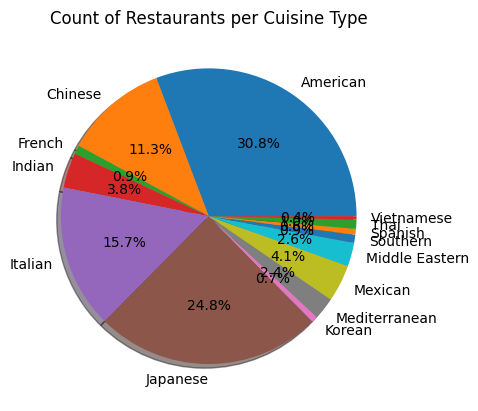

In [ ]:
import matplotlib.pyplot as plt

plt.pie(restaurantCount, labels=restaurantCount.index, autopct='%1.1f%%',shadow=True)
plt.title("Count of Restaurants per Cuisine Type")
plt.show()

(b) Show only the 5 cuisine types with most restaurants.

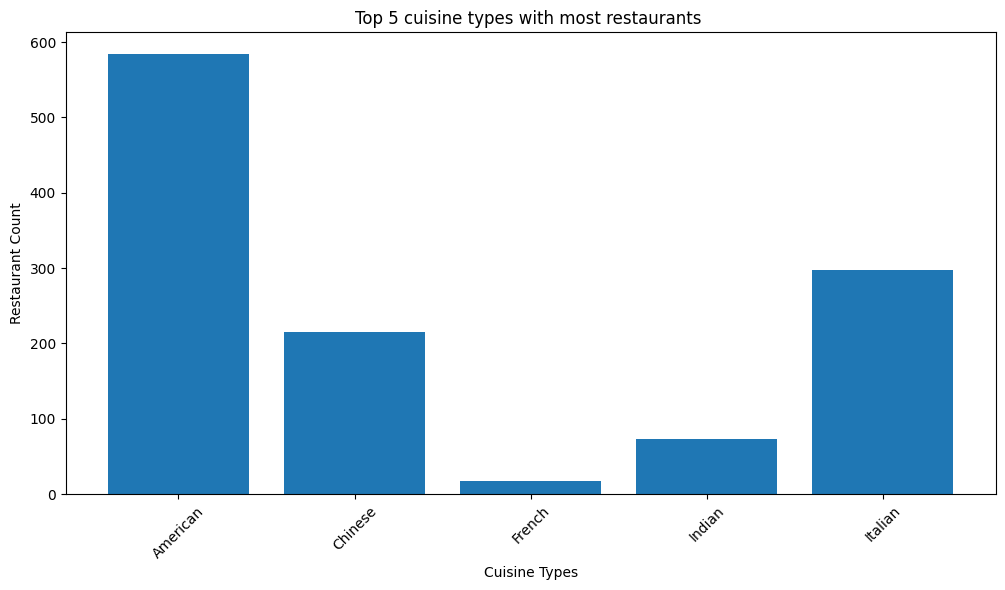

In [8]:
# Show only the top 5 cuisine types with most restaurants by displaying graph

restaurant_name_counts = restaurantCount.head(5)
plt.figure(figsize=(12, 6))


plt.bar(restaurant_name_counts.index, restaurant_name_counts.values)
plt.title("Top 5 cuisine types with most restaurants ") 
plt.xlabel("Cuisine Types")
plt.ylabel("Restaurant Count")
plt.xticks(rotation=45)

plt.show()

### Task 10:
(a) Plot a graph that shows the 10 most popular restaurant name.

(b) Highlight the top 3.

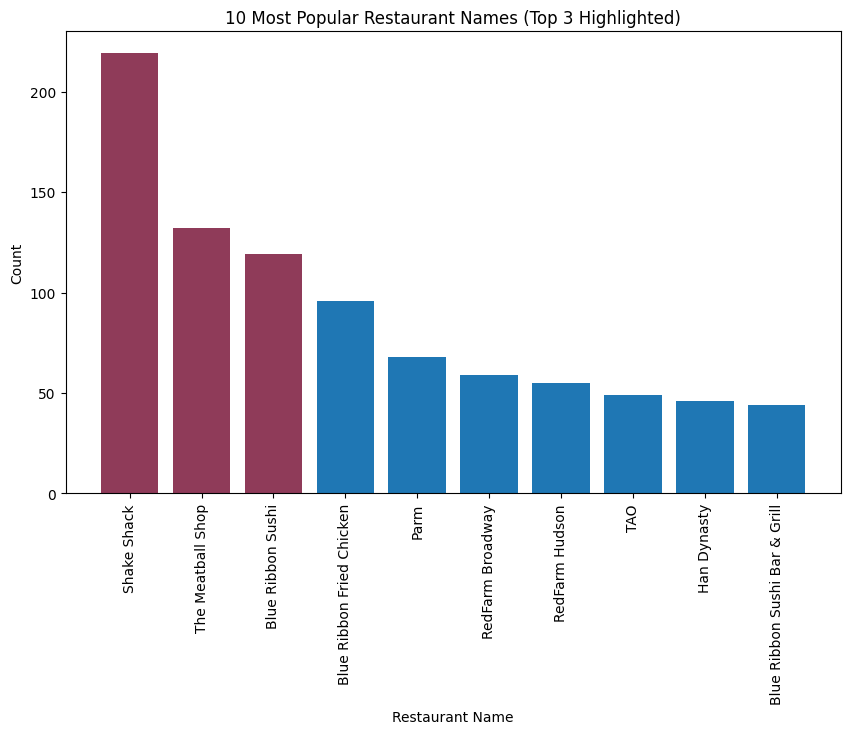

In [9]:
#Libraries already declared so I initiate the plotting area first
plt.figure(figsize=(10, 6))
# Getting list of top 10 restaurants
popular_restaurants = dfs['restaurant_name'].value_counts().head(10)
#plotting 10 restaurants
plt.bar(popular_restaurants.index, popular_restaurants.values)

plt.xlabel("Restaurant Name")
plt.ylabel("Count")
plt.title("10 Most Popular Restaurant Names (Top 3 Highlighted)")
plt.xticks(rotation=90)
# now code to highlight top 3 only
plt.bar(popular_restaurants.index[:3], popular_restaurants.values[:3], color='r', alpha=0.5)
plt.show()

### Task 11:
10 most popular restaurants for each cuisine type and highlight the top 3.

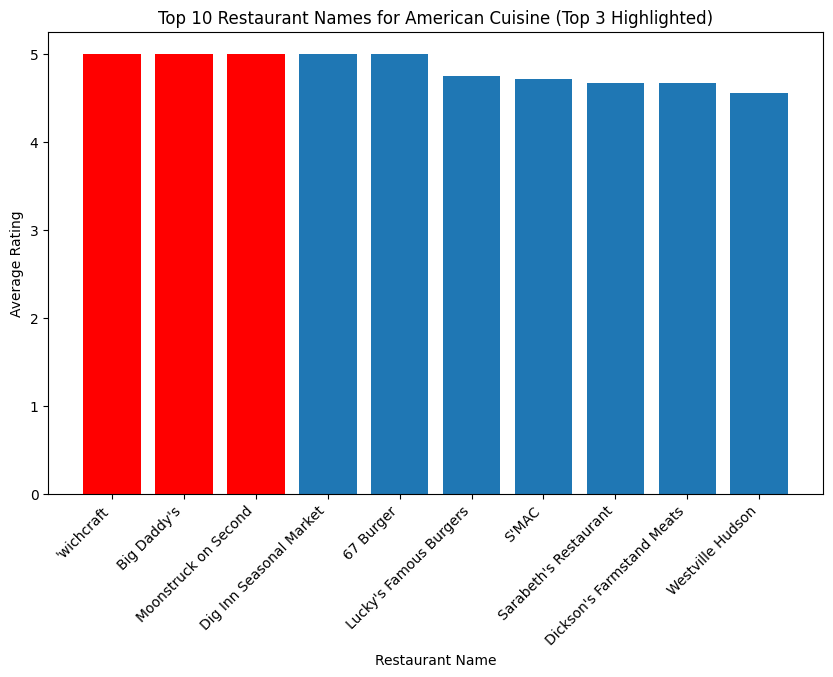

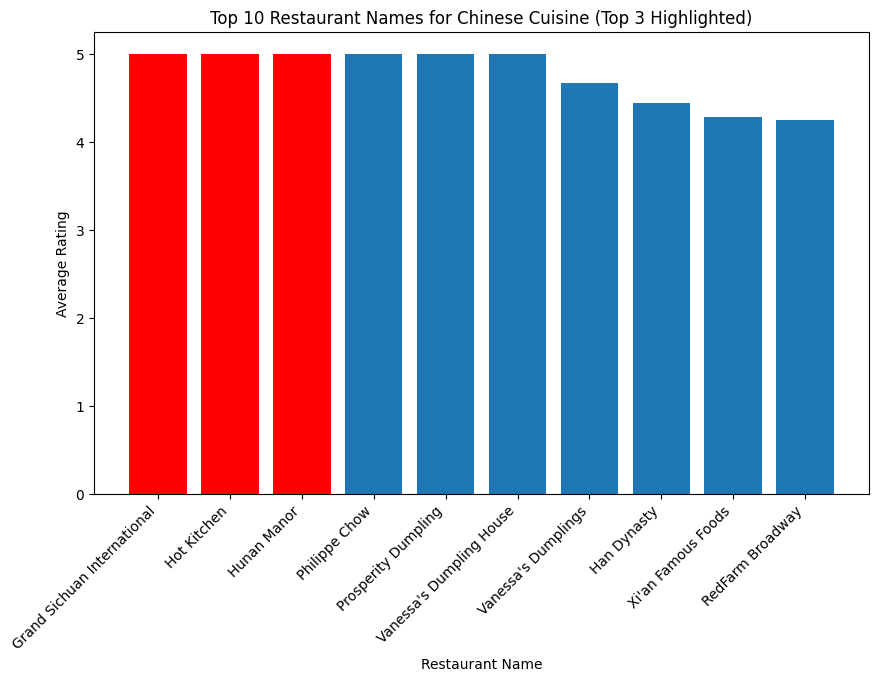

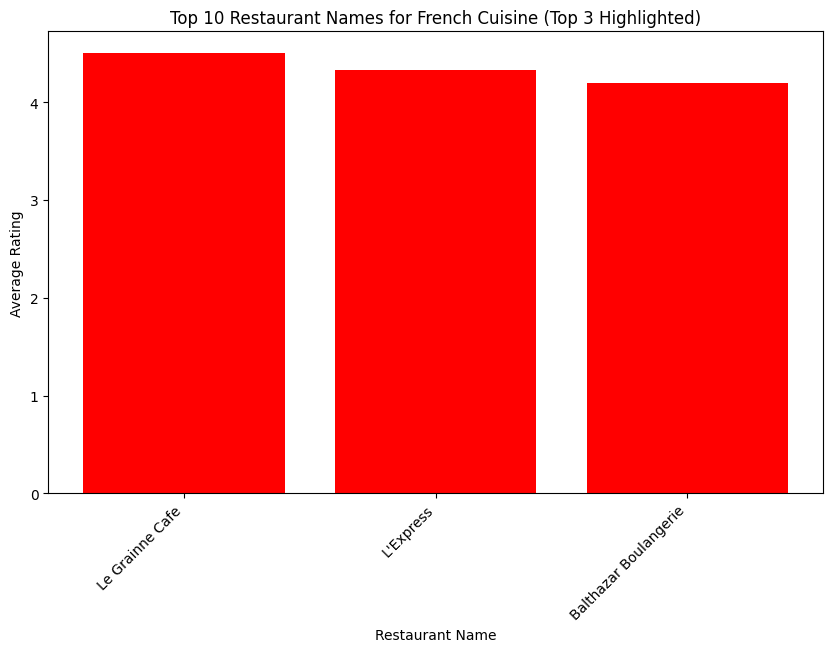

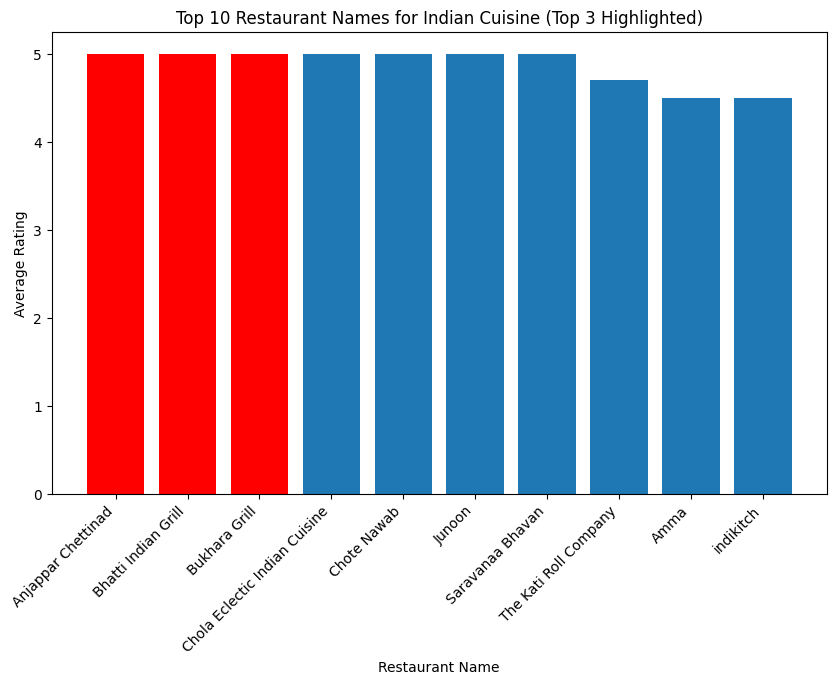

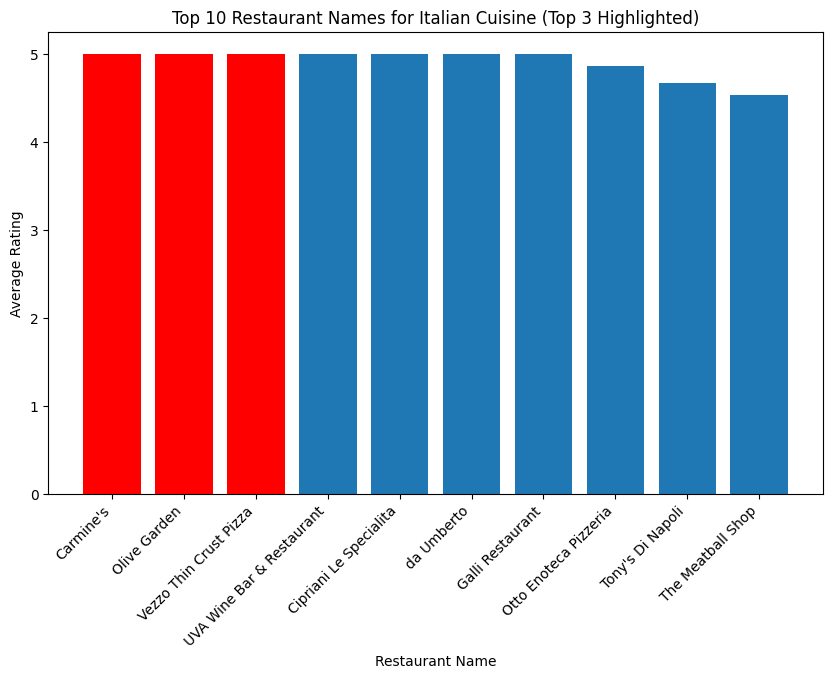

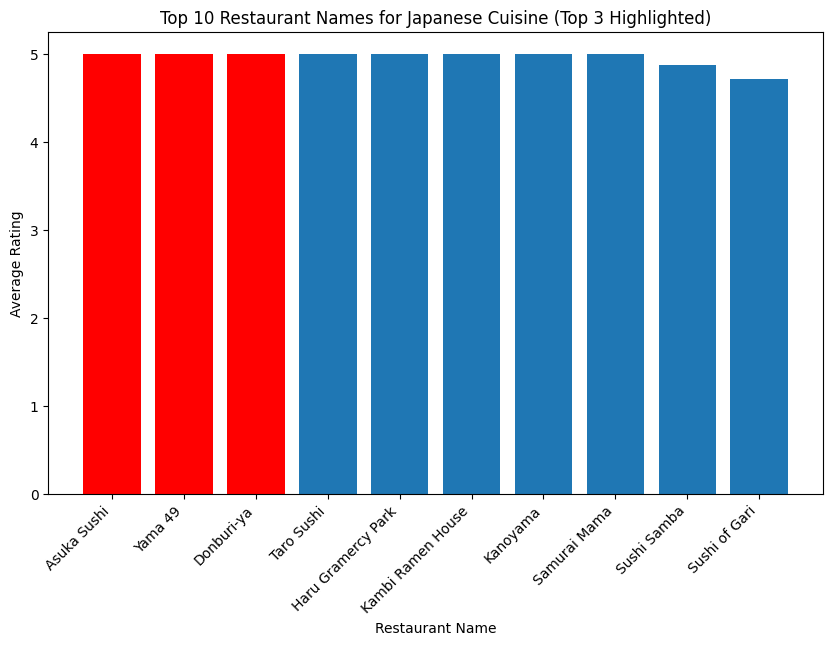

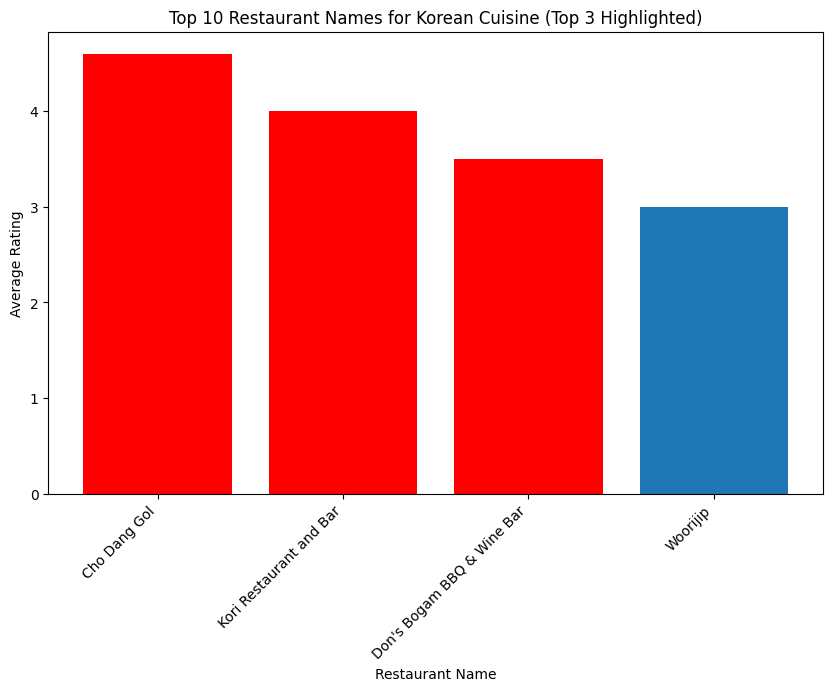

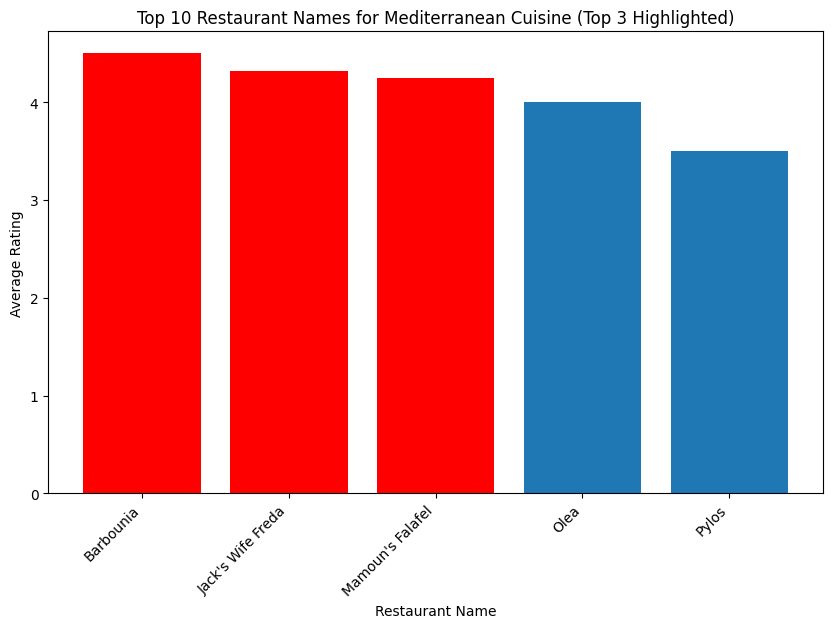

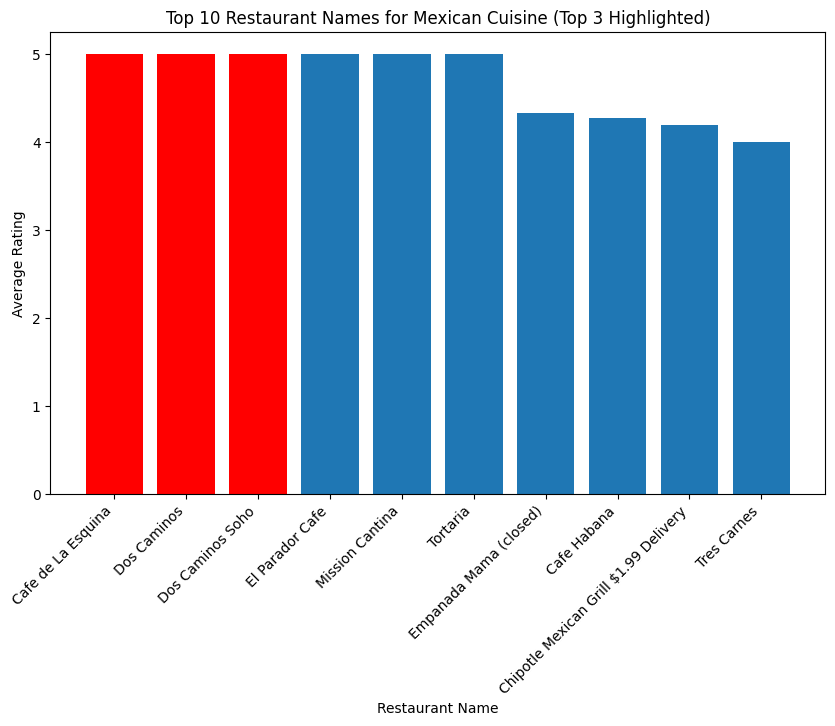

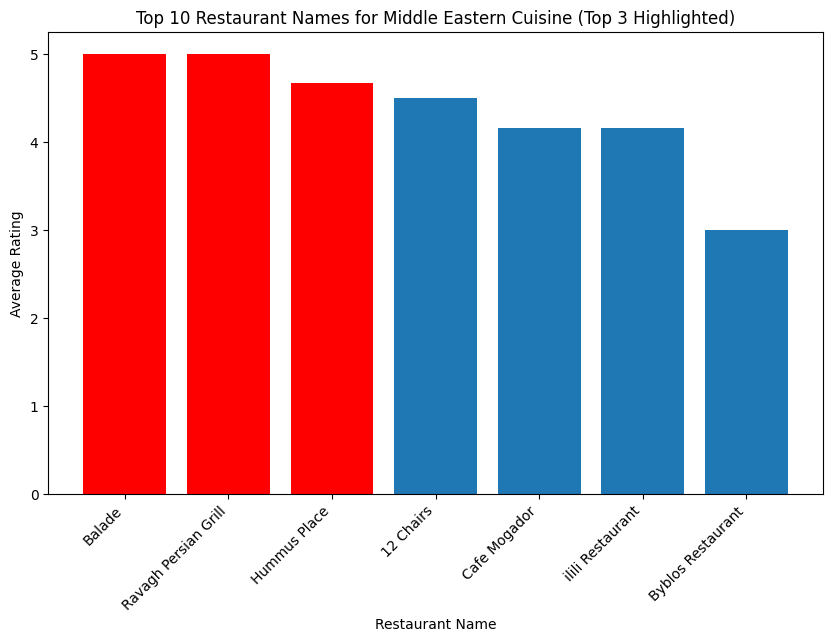

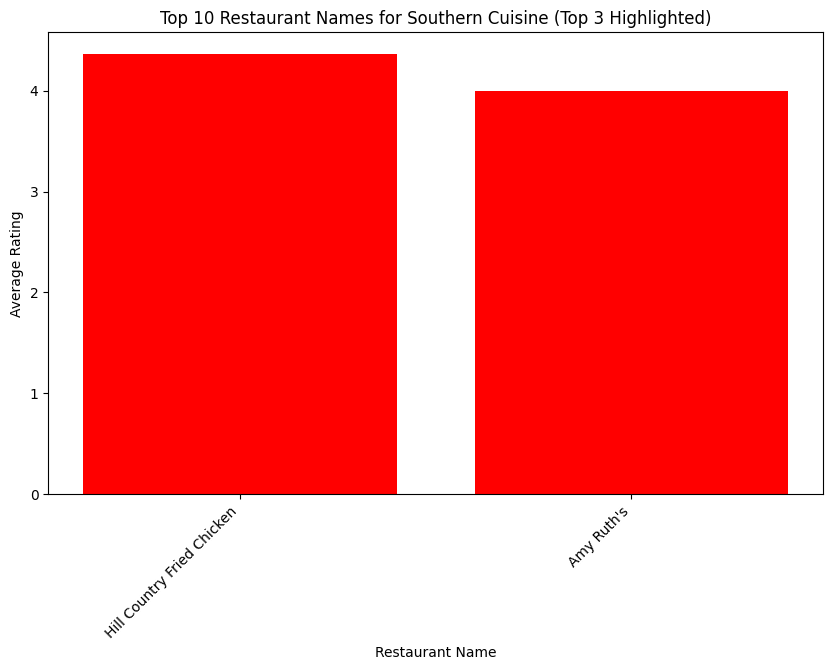

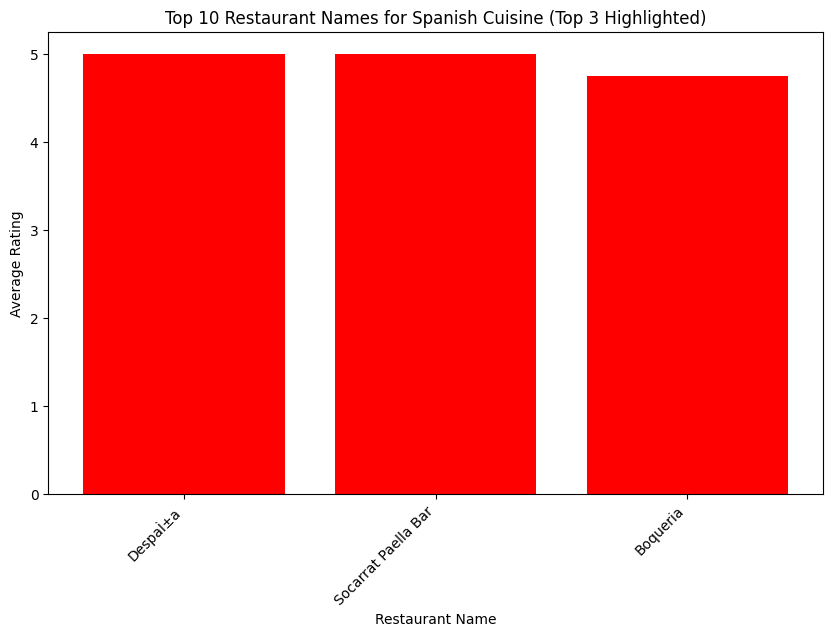

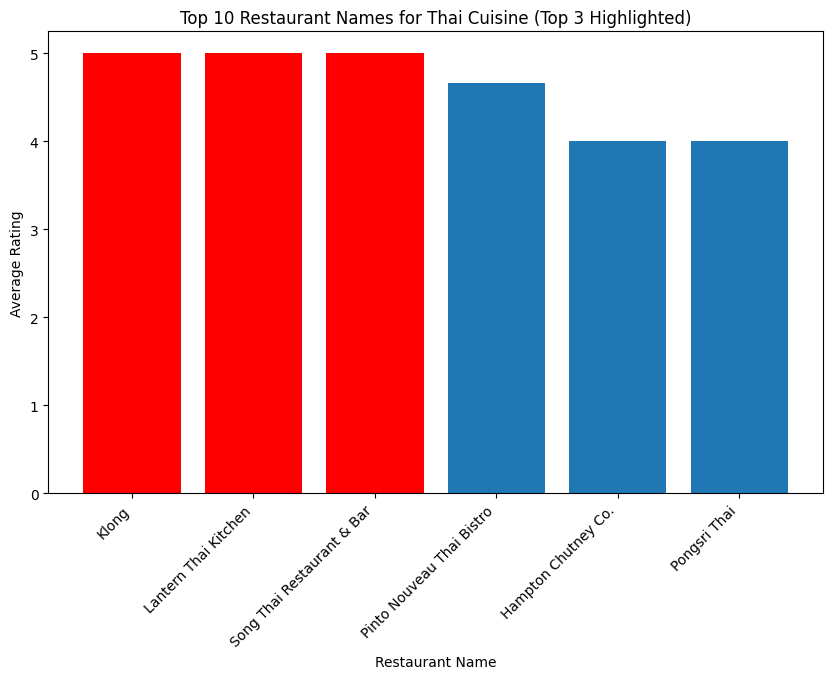

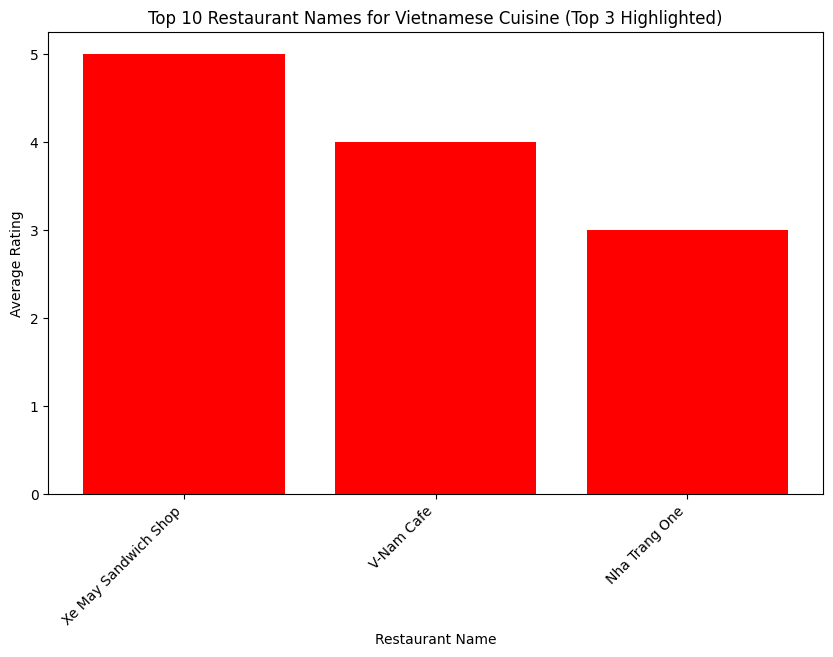

In [14]:
#Libraries already declared so I initiate by cleaning the data first, rating column needs cleansing so I am removing "not given" to "null"

# Replace "not given" with null values in the 'rating'
dfs['rating'] = pds.to_numeric(dfs['rating'], errors='coerce')

# Filter out rows with null 'rating' values
dfs = dfs.dropna(subset=['rating'])

# Group by cuisine type
cuisine_groups = dfs.groupby('cuisine_type')

# Loop through each cuisine type and plot the top 10 restaurant names with top 3 highlighted
for cuisine_type, group_df in cuisine_groups:
    restaurant_ratings = group_df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False)
    top10_restaurant_names = restaurant_ratings.head(10)
    top3_restaurant_names = top10_restaurant_names.head(3)
    print("\n\n")


# initiate the plotting area
    plt.figure(figsize=(10, 6))
    plt.bar(top10_restaurant_names.index, top10_restaurant_names.values)

    plt.xlabel("Restaurant Name")
    plt.ylabel("Average Rating")
    plt.title(f"Top 10 Restaurant Names for {cuisine_type} Cuisine (Top 3 Highlighted)")
    plt.xticks(rotation=45, ha='right')
    # now plot highlight top 3 only
    plt.bar(top3_restaurant_names.index, top3_restaurant_names.values, color='r')
    plt.show()

### **Task 12:**
(a) What is the proportion of reviews for Shake Shack?


In [15]:
shakeshack_reviews = dfs[(dfs['restaurant_name'] == 'Shake Shack') & (dfs['cuisine_type'] == 'American')]
total_reviews = dfs.shape[0] #Calculating all array

proportion_shakeshack_reviews = shakeshack_reviews.shape[0] / total_reviews #calculating shakeshack reviews by performing division
print('Proportion of reviews for Shake Shack: {:.2%}'.format(proportion_shakeshack_reviews))

Proportion of reviews for Shake Shack: 11.45%


(b) Use a pie chart to display your results.

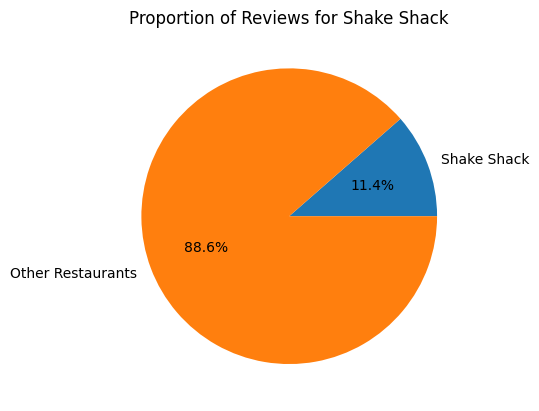

In [16]:
#Shake shack vs Other restaurants, I manually add other restaurant lable to more clarification
labels = ['Shake Shack', 'Other Restaurants']
sizes = [proportion_shakeshack_reviews, 1 - proportion_shakeshack_reviews]
plt.pie(sizes, labels=labels,  autopct='%1.1f%%')
plt.title('Proportion of Reviews for Shake Shack')
plt.show()

### **Task 13:**
Is there a link between ratings and food preparation time? Justify your answer. You may use an appropriate graph

Yes, They are relatively proportional to each other as you can see reducing the time means increasing the rating 

 


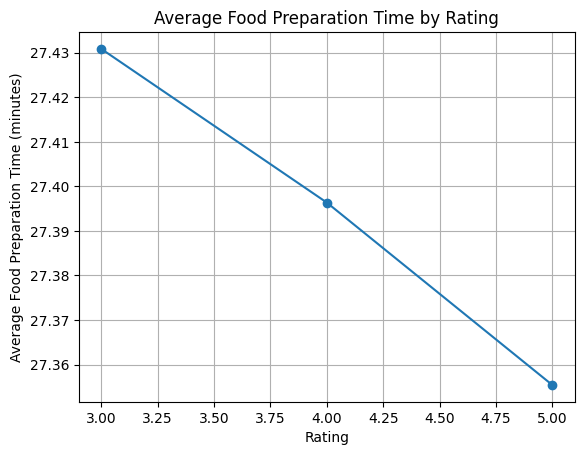

In [25]:
# Group data by rating and calculate average food preparation time

print('Yes, They are relatively proportional to each other as you can see reducing the time means increasing the rating \n\n ')
avg_prep_time_by_rating = dfs.groupby('rating')['food_preparation_time'].mean()

ratings = avg_prep_time_by_rating.index.tolist()
avg_prep_times = avg_prep_time_by_rating.tolist()

# using line chart
plt.plot(ratings, avg_prep_times, marker='o')
plt.title('Average Food Preparation Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Food Preparation Time (minutes)')
plt.grid(True)
plt.show()


#  **Part 2** 
### **2.1 Data Loading**
Task 1: Load the dataset tweets.csv into a pandas DataFrame.

In [26]:
#Uploading csv file into Colab
from google.colab import files
uploaded = files.upload()


Saving tweets.csv to tweets.csv


In [27]:
# Load the CSV dataset into a pandas DataFrame
df = pds.read_csv("tweets.csv")

Task 2: Display the last 10 rows of your dataset

In [29]:
print(df.tail(10))

                                                 Tweets  Retweets   Likes  \
3050                          @cybrtrkguy Vote them out      7712   68748   
3051  If you scare people enough, they will demand r...    119804  543466   
3052  Seems odd that the UN still hasn’t released 20...     32799  262118   
3053  @jayvasdigital Freedom is being stripped away ...     12348   63170   
3054  @LimitingThe @baglino Manganese also requires ...       128    2543   
3055  @LimitingThe @baglino Just that manganese is a...       171    3173   
3056              @incentives101 @ICRicardoLara Exactly       145    4234   
3057  @ICRicardoLara Your policies are directly resp...       421    6144   
3058   @ICRicardoLara You should be voted out of office       484    7029   
3059         CB radios are free from govt/media control     11302  113429   

                     Date  
3050  2022-01-27 23:41:28  
3051  2022-01-27 23:39:57  
3052  2022-01-27 22:24:24  
3053  2022-01-27 22:05:43  
3054  2022-0

###**2.2 Data Cleaning**

In [30]:
#decalring the other libraries
import seaborn as sns
import re                                       # Import the re library for regular expressions
from textblob import TextBlob                    # Import TextBlob for text processing
import string                                   # Import the string library for handling punctuation
from nltk.corpus import stopwords               # Import NLTK's stopwords for removing common words
from nltk.tokenize import word_tokenize         # Import NLTK's word_tokenize for tokenizing words
from nltk.stem import WordNetLemmatizer          # Import NLTK's WordNetLemmatizer for lemmatizing words
from collections import Counter

import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Task 3: Remove hyperlinks.

In [44]:
# remove urls
df['tweet_cleaned'] = df['Tweets'].apply(lambda text: re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?#]\S*", "", text))
print(df.head(5))

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                                   tweet_cleaned  
0  2022-10-27 16:17:39                           @PeterSchiff 🤣 thanks  
1  2022-10-27 13:19:25                           @ZubyMusic Absolutely  
2  2022-10-27 13:08:00                       Dear Twitter Advertisers   
3  2022-10-27 02:32:48                                     @BillyM2k 👻  
4  2022-10-26 21:39:32  Meeting a lot of cool people at Twitter today!  


Task 4: Remove stopwords. 

In [45]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: " ".join([word for word in text.split() if word not in stop_words]))



                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                           tweet_cleaned  
0  2022-10-27 16:17:39                   @PeterSchiff 🤣 thanks  
1  2022-10-27 13:19:25                   @ZubyMusic Absolutely  
2  2022-10-27 13:08:00                Dear Twitter Advertisers  
3  2022-10-27 02:32:48                             @BillyM2k 👻  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today!  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Task 5: Remove mentions

In [59]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: re.sub("@\S+", "", text))


Task 6: Remove the hashtag

In [58]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: re.sub("#", "", text))


Task 7: Remove punctuation signs

In [57]:
import string
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))


Task 8: Remove the word ”RT”. 

In [56]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: re.sub(r'\bRT\b', '', text))


Task 9: Remove emojis.

In [60]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: ''.join(i for i in text if i <= '\uFFFF'))


                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  
0  2022-10-27 16:17:39                                 thanks  
1  2022-10-27 13:19:25                             Absolutely  
2  2022-10-27 13:08:00               Dear Twitter Advertisers  
3  2022-10-27 02:32:48                                         
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today  


Task 10: Remove leading and trailing whitespaces.

In [61]:
df['tweet_cleaned'] = df['tweet_cleaned'].str.strip()


                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  
0  2022-10-27 16:17:39                                 thanks  
1  2022-10-27 13:19:25                             Absolutely  
2  2022-10-27 13:08:00               Dear Twitter Advertisers  
3  2022-10-27 02:32:48                                         
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today  


Task 11: Apply lemmatization on every word.

In [62]:
lemmatizer = WordNetLemmatizer()
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  
0  2022-10-27 16:17:39                                 thanks  
1  2022-10-27 13:19:25                             Absolutely  
2  2022-10-27 13:08:00               Dear Twitter Advertisers  
3  2022-10-27 02:32:48                                         
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today  


Task 12: Store the cleaned tweet in a new column called tweet cleaned.

In [63]:
df['tweet_cleaned'] = df['tweet_cleaned'] 
#I already stored everything inside this new column and updating it on every step. I didn't create function as it'll the reptetion of cide